In [ ]:
import numpy as np
import math as m
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random as rand

Text(0.5, 0, 'Time (s)')

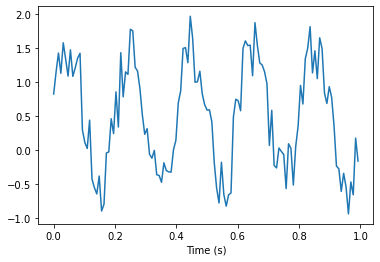

In [ ]:
timelist=[i/128 for i in range(128)]
x5=np.array([[m.sin(10*m.pi*i)] for i in timelist])
x10=np.array([[m.sin(20*m.pi*i)] for i in timelist])
times=np.array(timelist)
#plt.plot(timelist,x5,timelist,x10)
#plt.xlabel('Time (s)')

x5_noise=[[m.sin(10*m.pi*i)+rand.random()] for i in timelist]
plt.plot(timelist,x5_noise)
plt.xlabel('Time (s)')


In [ ]:
x5_train=np.array([[[m.sin(10*m.pi*i)+rand.random()] for i in timelist] for k in range(200)])
x10_train=np.array([[[m.sin(20*m.pi*i)+rand.random()] for i in timelist] for k in range(200)])
x_train=np.concatenate((x5_train,x10_train),axis=0)
y5_train=np.array([[1,0] for i in range(200)])
y10_train=np.array([[0,1] for i in range(200)])
y_train=np.concatenate((y5_train,y10_train),axis=0)
print(x_train.shape)
print(y_train.shape)


(400, 128, 1)
(400, 2)


In [ ]:
no_kernels=2
n_i=128
length_of_kernel=32

model=models.Sequential()
model.add(layers.Conv1D(no_kernels,length_of_kernel,activation='relu',padding='same',input_shape=(n_i,1)))
model.add(layers.Flatten())
model.add(layers.Dense(2,activation='softmax'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,batch_size=11,epochs=100,verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.9325
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 5.2106e-04 - accuracy: 1.0000
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 2.7241e-04 - accuracy: 1.0000
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 1.7036e-04 - accuracy: 1.0000
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 1.1493e-04 - accuracy: 1.0000
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 8.3352e-05 - accuracy: 1.0000
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 6.3155e-05 - accuracy: 1.0000
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 4.9443e-05 - accuracy: 1.0000
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 4.0080e

In [ ]:
kernel = model.get_weights()[0]
kernel_1=[kernel[i,0,0] for i in range(32)]
kernel_2=[kernel[i,0,1] for i in range(32)]

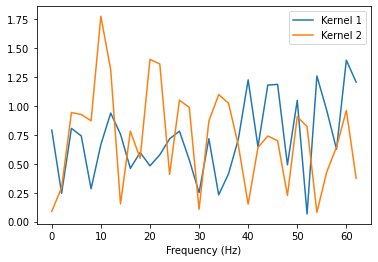

In [ ]:
filt1=np.fft.fft(kernel_1,64)
filt2=np.fft.fft(kernel_2,64)

plt.plot(np.array([2*i for i in range(32)]),abs(filt1[0:32]),label="Kernel 1")
plt.plot(np.array([2*i for i in range(32)]),abs(filt2[0:32]),label="Kernel 2")
plt.xlabel('Frequency (Hz)')
plt.legend(loc="upper right")

In [ ]:
print(abs(filt2))

[0.08909561 0.29346938 0.94306068 0.92589418 0.87159407 1.77532667
 1.31234416 0.15263782 0.78224636 0.54719154 1.4025963  1.36284181
 0.40781179 1.05001359 0.98762667 0.1062647  0.86937607 1.09790307
 1.0239073  0.65972673 0.15021317 0.64053846 0.74030206 0.69905489
 0.22644452 0.90675992 0.82150275 0.07958644 0.42863377 0.64431166
 0.96066438 0.37385541 0.12959777 0.37385541 0.96066438 0.64431166
 0.42863377 0.07958644 0.82150275 0.90675992 0.22644452 0.69905489
 0.74030206 0.64053846 0.15021317 0.65972673 1.0239073  1.09790307
 0.86937607 0.1062647  0.98762667 1.05001359 0.40781179 1.36284181
 1.4025963  0.54719154 0.78224636 0.15263782 1.31234416 1.77532667
 0.87159407 0.92589418 0.94306068 0.29346938]


[[1, 2, 3], [1, 2, 3]]


Text(0.5, 0, 'Time (s)')

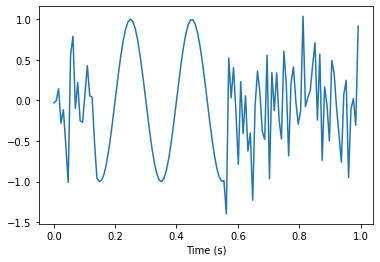

In [ ]:
#Noisy signals, 5Hz eg
timelist=[i/128 for i in range(128)]

front_noise_length=rand.randint(10,30)
sine_length=rand.randint(35,60)
back_noise_length=128-front_noise_length-sine_length

sine_times=[(i+front_noise_length)/128 for i in range(sine_length)]

front_noise=[[rand.gauss(0,0.45)] for i in range(front_noise_length)]
sine_section=[[m.sin(10*m.pi*i)] for i in sine_times]
back_noise=[[rand.gauss(0,0.45)] for i in range(back_noise_length)]

full_signal_list=front_noise+sine_section+back_noise
x5noise=np.array(full_signal_list)

list1=[1,2,3]
print([]+[list1]+[list1])

times=np.array(timelist)
plt.plot(timelist,x5noise)
plt.xlabel('Time (s)')


In [ ]:
x5_samples_list=[]
for k in range(200):
  front_noise_length=rand.randint(10,30)
  sine_length=rand.randint(35,60)
  back_noise_length=128-front_noise_length-sine_length

  sine_times=[(i+front_noise_length)/128 for i in range(sine_length)]

  front_noise=[[rand.gauss(0,0.45)] for i in range(front_noise_length)]
  sine_section=[[m.sin(10*m.pi*i)] for i in sine_times]
  back_noise=[[rand.gauss(0,0.45)] for i in range(back_noise_length)]

  full_signal_list=front_noise+sine_section+back_noise
  x5_samples_list=x5_samples_list+[full_signal_list]

x10_samples_list=[]
for k in range(200):
  front_noise_length=rand.randint(10,30)
  sine_length=rand.randint(35,60)
  back_noise_length=128-front_noise_length-sine_length

  sine_times=[(i+front_noise_length)/128 for i in range(sine_length)]

  front_noise=[[rand.gauss(0,0.45)] for i in range(front_noise_length)]
  sine_section=[[m.sin(20*m.pi*i)] for i in sine_times]
  back_noise=[[rand.gauss(0,0.45)] for i in range(back_noise_length)]

  full_signal_list=front_noise+sine_section+back_noise
  x10_samples_list=x10_samples_list+[full_signal_list]

x5_train_noise=np.array(x5_samples_list)
x10_train_noise=np.array(x10_samples_list)
x_train_noise=np.concatenate((x5_train_noise,x10_train_noise),axis=0)
y5_train=np.array([[1,0] for i in range(200)])
y10_train=np.array([[0,1] for i in range(200)])
y_train=np.concatenate((y5_train,y10_train),axis=0)

print(x_train_noise.shape)
print(y_train.shape)

(400, 128, 1)
(400, 2)


In [ ]:
no_kernels=2
n_i=128
length_of_kernel=32

model_n=models.Sequential()
model_n.add(layers.Conv1D(no_kernels,length_of_kernel,activation='relu',padding='same',input_shape=(n_i,1)))
model_n.add(layers.Dropout(0.8))
model_n.add(layers.Flatten())
model_n.add(layers.Dense(2,activation='softmax'))
model_n.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_n.fit(x_train_noise,y_train,batch_size=11,epochs=100,verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.2129 - accuracy: 0.6550
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.7950
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9025
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9500
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9575
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9575
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9875
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9850
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9725
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9875
Epoch 11/

Text(0.5, 1.0, 'Kernel 1 Frequency Gain Response')

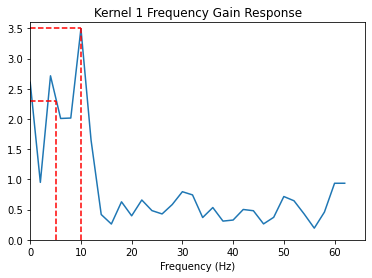

In [ ]:
kernel = model_n.get_weights()[0]
kernel_1=[kernel[i,0,0] for i in range(32)]
kernel_2=[kernel[i,0,1] for i in range(32)]

filt1=np.fft.fft(kernel_1,64)
filt2=np.fft.fft(kernel_2,64)

x1=[5,5]
y1=[0,2.3]
x2=[0,5]
y2=[2.3,2.3]
x3=[10,10]
y3=[0,3.5]
x4=[0,10]
y4=[3.5,3.5]



plt.plot(np.array([2*i for i in range(32)]),abs(filt1[0:32]))
ax = plt.gca()
ax.set_ylim([0, 3.6])
ax.set_xlim([0, 66])
plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,linestyle='--',color="red")
plt.xlabel('Frequency (Hz)')
plt.title('Kernel 1 Frequency Gain Response')

Text(0.5, 1.0, 'Kernel 2 Frequency Gain Response')

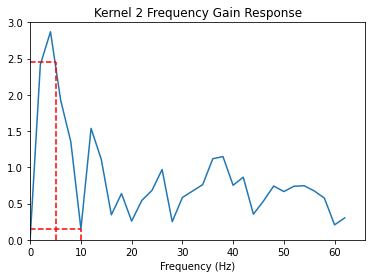

In [ ]:
x1=[5,5]
y1=[0,2.45]
x2=[0,5]
y2=[2.45,2.45]
x3=[10,10]
y3=[0,0.15]
x4=[0,10]
y4=[0.15,0.15]



plt.plot(np.array([2*i for i in range(32)]),abs(filt2[0:32]))
ax = plt.gca()
ax.set_ylim([0, 3])
ax.set_xlim([0, 66])
plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,linestyle='--',color="red")
plt.xlabel('Frequency (Hz)')
plt.title('Kernel 2 Frequency Gain Response')